# HOL2148 - Use Db2 BigSQL with Objectstore

## 0. Introduction

In this notebook we connect to an Db2 BigSQL Instance.   
As backing objectstore the local Minio Server that was introduced in the previous section will be used.   
Remember to set this notebook in edit mode by clicking the pen-icon on the top right icon bar.
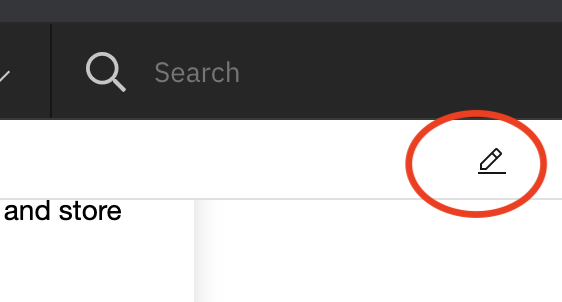

## 1. Prerequistes
A data connection "BigSQL" must be configured, add it to the project if not already done, else followed the steps as given in "20-OjectstoreUtilities" for the Minio connection.

1. Go Back to the Project Landing Page or open it in a new tab (righ-click and choose to open in a new tab)
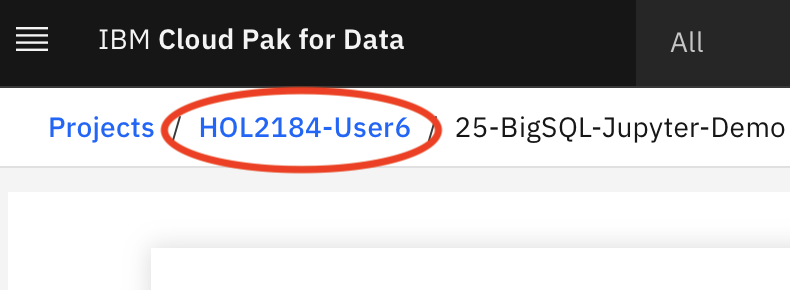
2. Add a connection-asset to the project
   - This time we will use a predifined "Platform connection" this is already preconfigured (lets say by a data engineer) and you can reuse it.
   - Click "Add to project" from the top right
   - Click "Connection" 
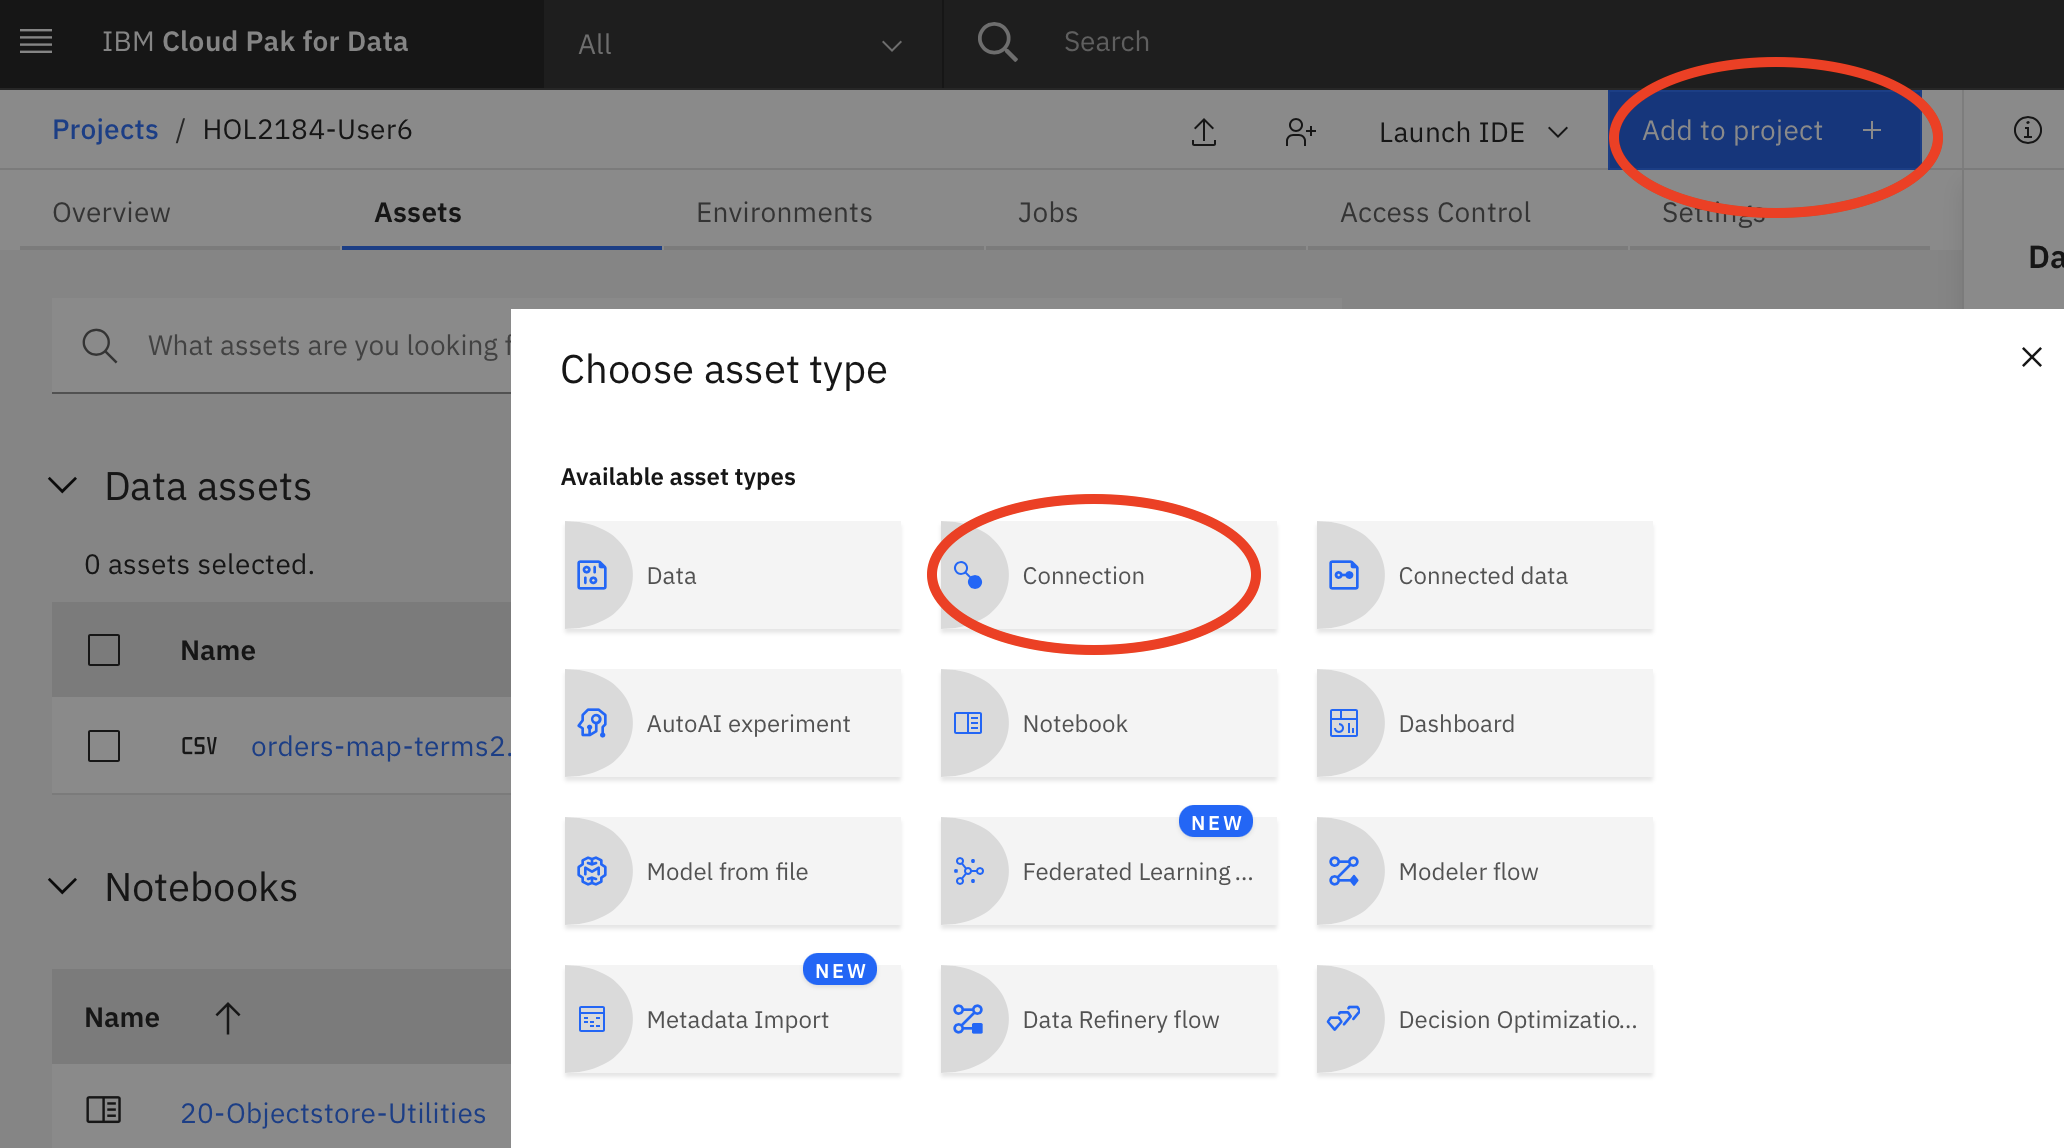
3. Add Connection
    - Choose "From platform"
    - and then "BigSQL"
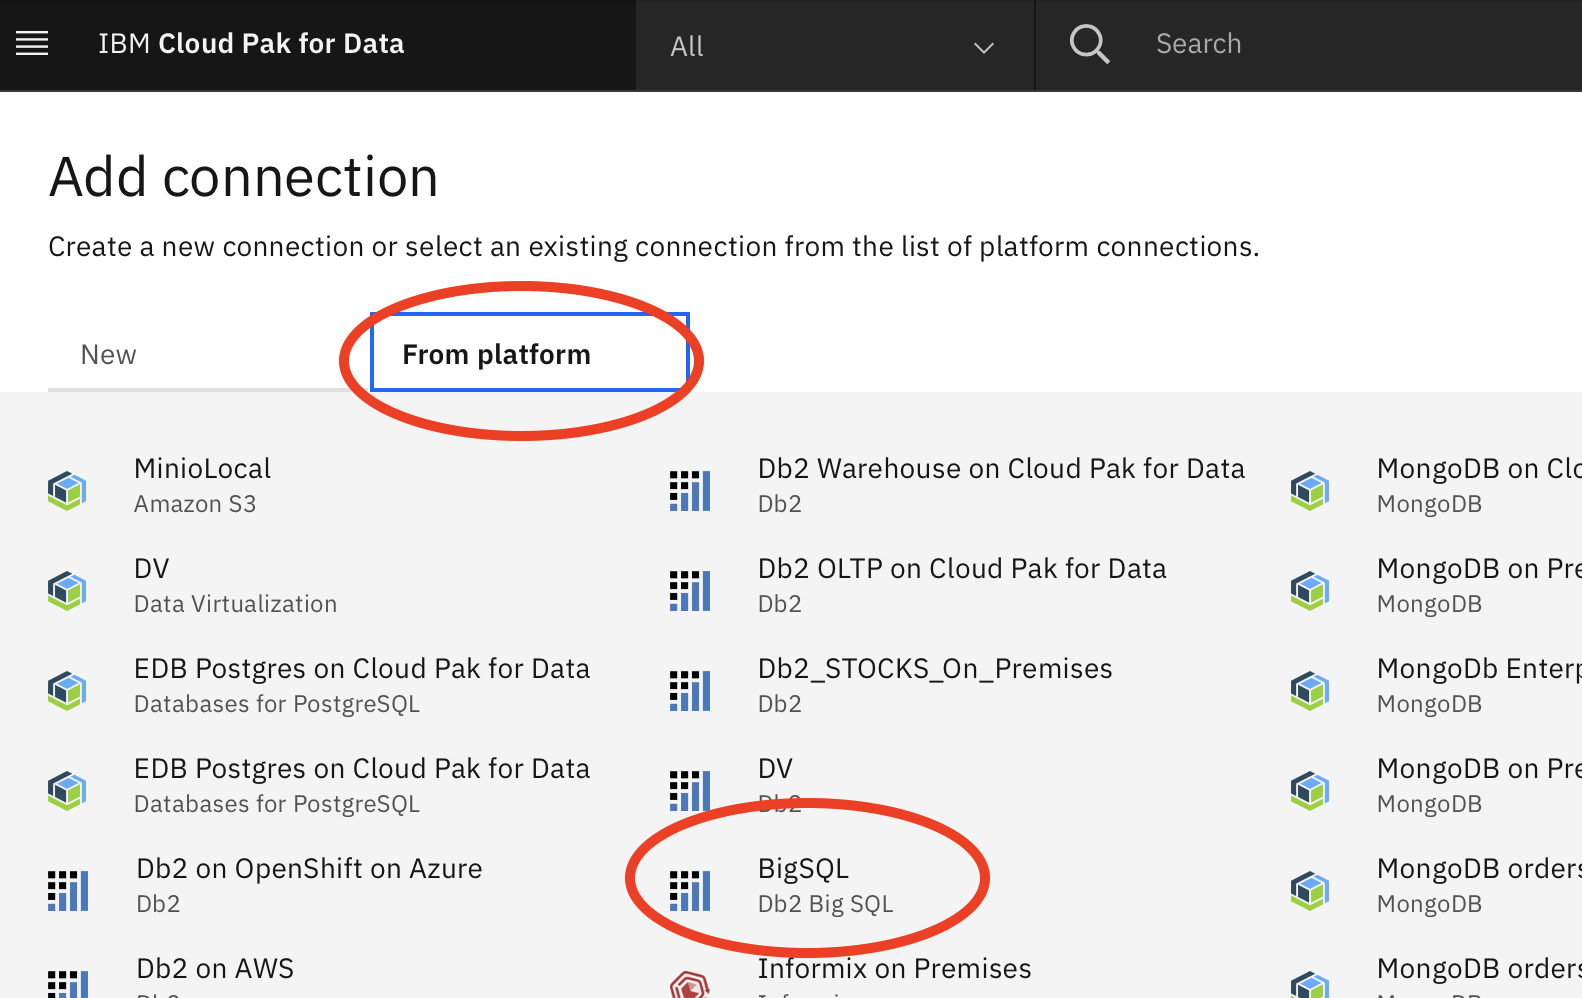
Provide a valid BigSQL credential and click "Add".   
Your personal user has the required access rights, so just use your users Cloud Pak for Data credentials.
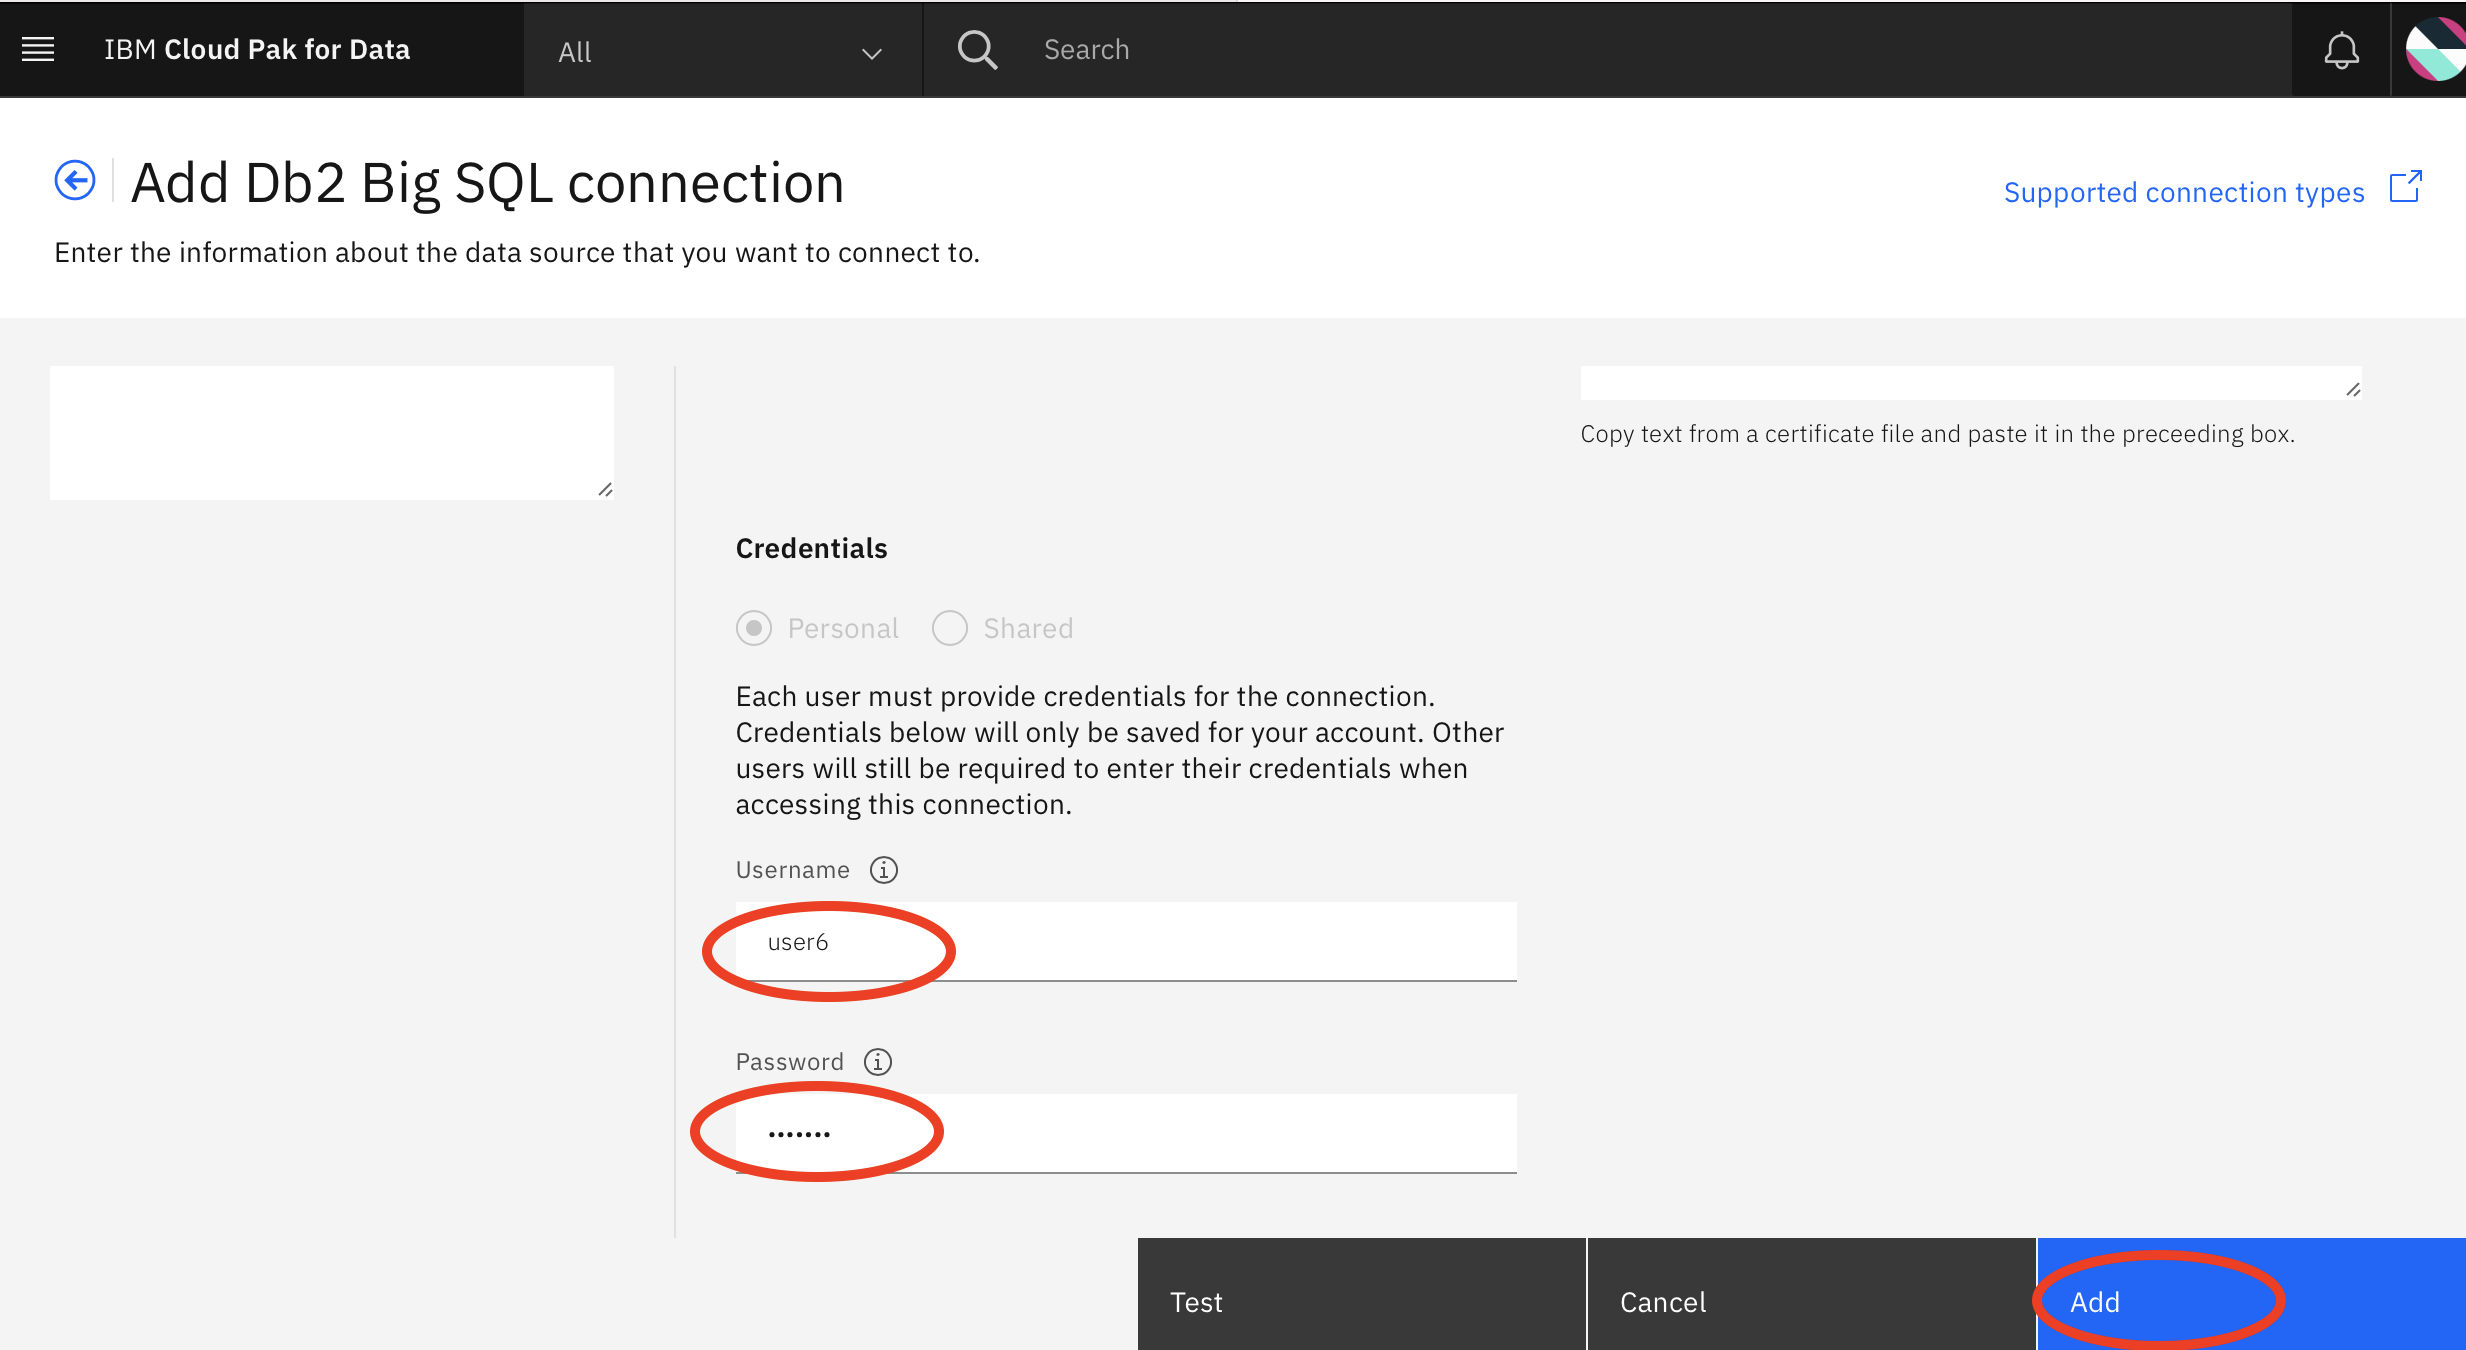
   - User = user<YOUR-ID>
   - Password = HOL2184   
No further changes needed, just choose "Add"
4. Return to this notebook

## 2 Flow
1. Connect to BigSQL
2. Perform a sample query
3. Add your own query, using the Objects from the ETL Section

In [ ]:
# prereq1 - Dataconnection "BigSQL"

from project_lib import Project
project = Project.access()

BigSQL_metadata = project.get_connection(name="BigSQL")

import os, jaydebeapi, pandas as pd

# construct connection String
BigSQL_url = 'jdbc:db2://{}:{}/{}'.format(
    BigSQL_metadata['host'],
    BigSQL_metadata.get('port', 50000),
    BigSQL_metadata['database']
)

In [ ]:
# Connect to Db2 BigSQL, standard Db2 jdbc driver will be used
BigSQL_connection = jaydebeapi.connect(
    'com.ibm.db2.jcc.DB2Driver',
    BigSQL_url,
    [BigSQL_metadata['username'],BigSQL_metadata['password']]
)

In [ ]:
# In Db2 the catalaog is always there so just print the first row to verify the connection works
query = 'SELECT * FROM "SYSCAT"."TABLES"'
data_df_1 = pd.read_sql_query(query, con=BigSQL_connection)
data_df_1.head(1)

## Rewrite the following statement with your query of choice
E.g. use any of the objects created in the previous lab
And than play around:
   - Replace "USERnn" in the following cell with the schema you have used.
   - Replace the table used below with any object you have created.
   - Try a more sophisticated SQL.

In [ ]:
query = 'SELECT * FROM USER00.ORDERS_PQ FETCH FIRST 5 ROWS ONLY'
data_df_1 = pd.read_sql_query(query, con=BigSQL_connection)
# print the first rows
data_df_1.head()

In [ ]:
# output number of rows in dataframe
len(data_df_1.index)

In [ ]:
# Close the connection
BigSQL_connection.close()

This ends the BigSQL part of the lab

**This project contains Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2021. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.<br>**